In [40]:
# PCOS diagnostics 
# Data from https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos
# Visualizing happiness through several data 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True) 
import cufflinks as cp

In [41]:
without_infer = pd.read_csv('PCOS_data_without_infertility.csv')
infer = pd.read_csv('PCOS_infertility.csv')

In [42]:
without_infer.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [43]:
infer

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


In [44]:
PCOS_data = pd.merge(without_infer,infer,on='Patient File No.',how='left',suffixes=('','_y'),)

In [45]:
# Drop the repeated information columns
PCOS_data.drop(columns=['Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'],axis = 1, inplace=True)

In [46]:
# Drop irrelevant columns
PCOS_data.drop(columns=['Sl. No','Patient File No.'],inplace=True)

In [47]:
nums_row = PCOS_data.shape[0]
nums_cols = PCOS_data.shape[1]
print(nums_row,nums_cols)

541 43


In [48]:
# Check for outliers
PCOS_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of abortions        541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

int64      21
float64    19
object      3
dtype: int64

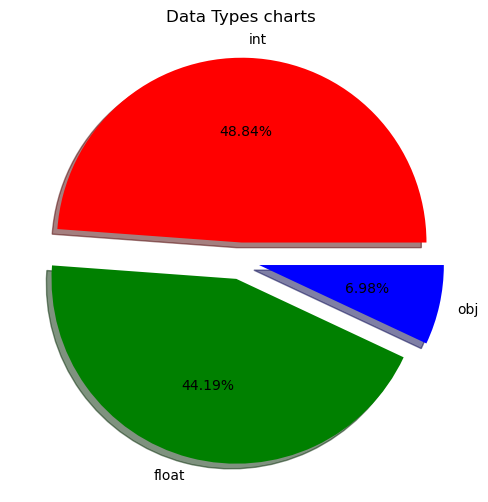

In [49]:
# Data Types
obj_type = PCOS_data.dtypes.value_counts()
labels = ['int','float','obj']
colors = ['red','green','blue']
explode = [0.1,0.1,0.1]

# Visualization
plt.figure(figsize=(12,6))
plt.pie(obj_type,explode=explode,labels=labels,colors=colors,autopct='%1.2f%%',shadow=True)
plt.title('Data Types charts',loc='center')

PCOS_data.dtypes.value_counts()

In [50]:
#Which columns have numerical data?
nums_cols = [c for c in PCOS_data.columns if PCOS_data.dtypes[c] == 'int64' or PCOS_data.dtypes[c] == 'float64']
print(nums_cols)

['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


In [51]:
#Which columns have object type?
nums_obj = [c for c in PCOS_data.columns if PCOS_data.dtypes[c] == 'object']
print(nums_obj)

['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)', 'Unnamed: 44']


In [52]:
#Display the first five rows
PCOS_data.head(5)

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [53]:
PCOS_data.tail(5)

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
536,0,35,50.0,164.592,18.5,17,72,16,11.0,2,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,0,30,63.2,158.000,25.3,15,72,18,10.8,2,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,0,36,54.0,152.000,23.4,13,74,20,10.8,2,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,0,27,50.0,150.000,22.2,15,74,20,12.0,4,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN
540,1,23,82.0,165.000,30.1,13,80,20,10.2,4,...,1.0,0,120,70,9,10,19.0,18.0,6.9,NaN


In [54]:
#Summary
PCOS_data.describe(include='all')

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,2
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915,NaN
std,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381,NaN
min,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000,NaN
50%,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,2.000000,...,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000,NaN
75%,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000,NaN


In [55]:
# Convert the object to numeric
PCOS_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of abortions        541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [56]:
# Check for duplicates
PCOS_data.duplicated().sum()

0

In [57]:
# All unique values 
PCOS_data.nunique()

PCOS (Y/N)                  2
 Age (yrs)                 29
Weight (Kg)               117
Height(Cm)                 50
BMI                       157
Blood Group                 8
Pulse rate(bpm)            11
RR (breaths/min)            8
Hb(g/dl)                   46
Cycle(R/I)                  3
Cycle length(days)         12
Marraige Status (Yrs)      34
Pregnant(Y/N)               2
No. of abortions            6
  I   beta-HCG(mIU/mL)    307
II    beta-HCG(mIU/mL)    203
FSH(mIU/mL)               371
LH(mIU/mL)                342
FSH/LH                    339
Hip(inch)                  19
Waist(inch)                23
Waist:Hip Ratio            22
TSH (mIU/L)               308
AMH(ng/mL)                301
PRL(ng/mL)                481
Vit D3 (ng/mL)            331
PRG(ng/mL)                 89
RBS(mg/dl)                 55
Weight gain(Y/N)            2
hair growth(Y/N)            2
Skin darkening (Y/N)        2
Hair loss(Y/N)              2
Pimples(Y/N)                2
Fast food 

In [58]:
# Convert everything to numeric
PCOS_data =PCOS_data.apply(pd.to_numeric,errors='coerce')

In [59]:
#Missing values
PCOS_data.isnull().sum()

PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of abortions            0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      1
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  1
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(Y/N)              0
Pimples(Y/N)                0
Fast food 

In [60]:
# Strip the extra space in columns names
PCOS_data.columns = [cols.strip() for cols in PCOS_data.columns]

In [61]:
# 90% or more of Unnamed column values are missing so dropping it
PCOS_data.drop(labels='Unnamed: 44',axis=1,inplace=True)

In [62]:
PCOS_data.replace(np.nan,0,inplace=True)

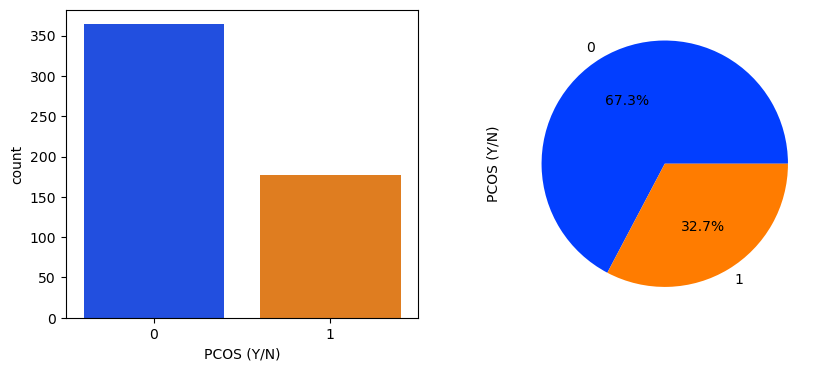

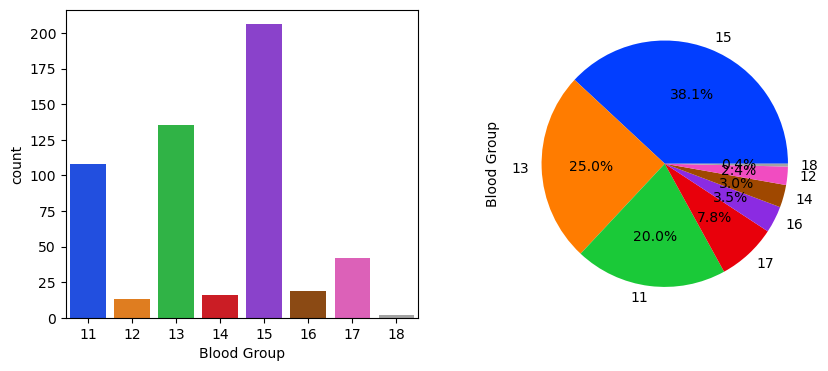

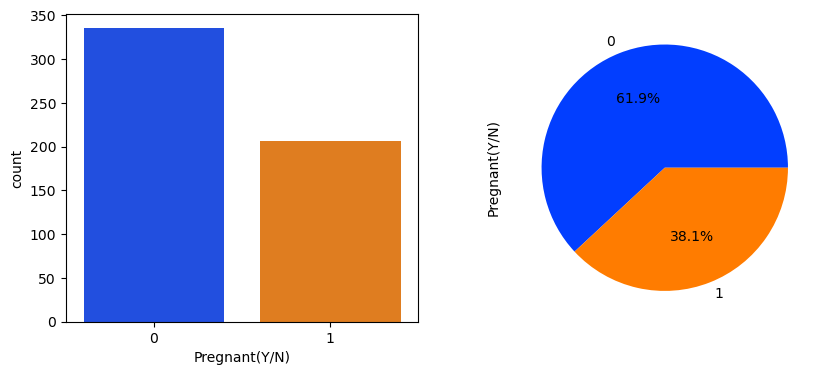

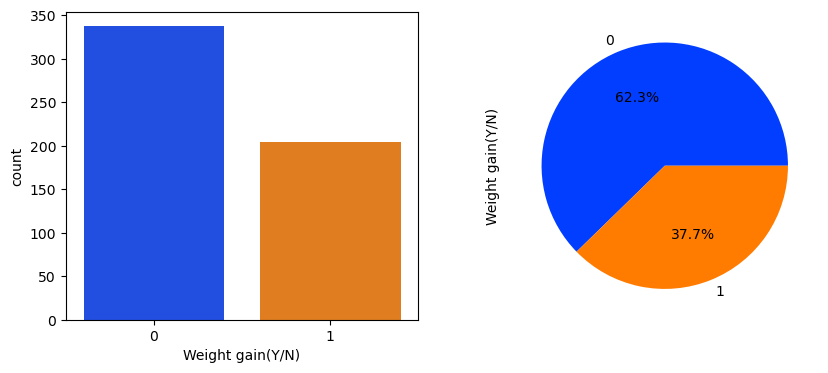

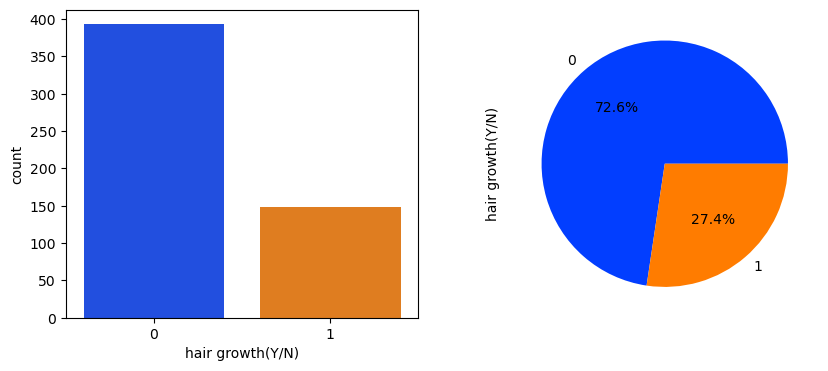

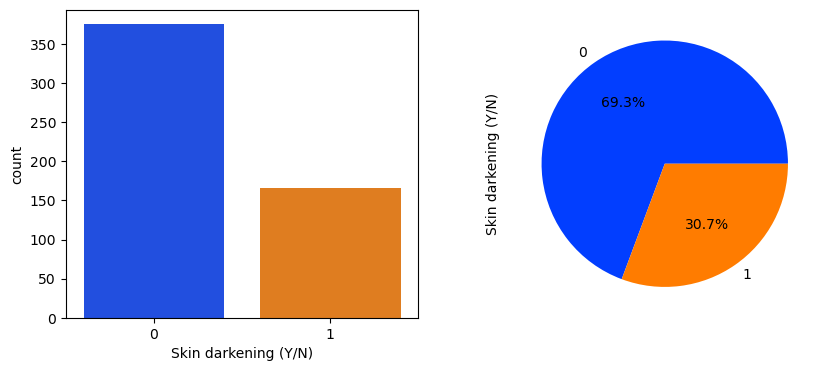

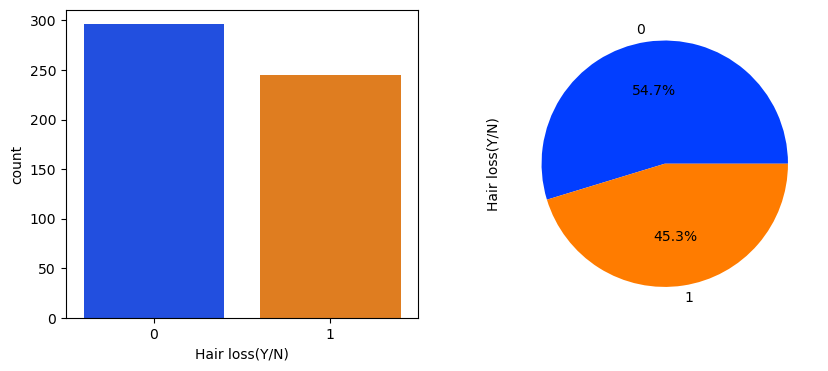

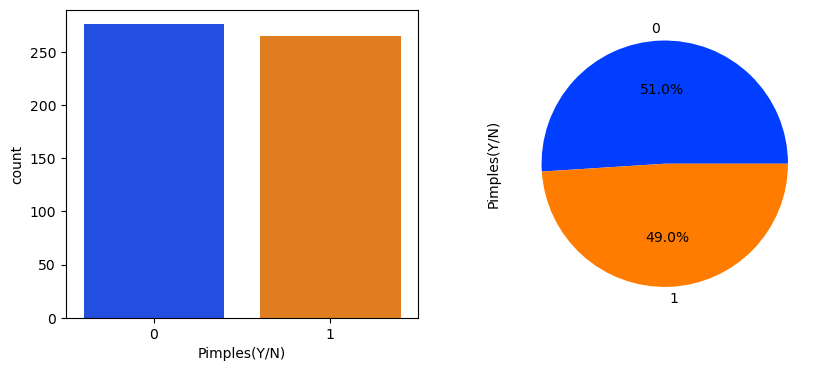

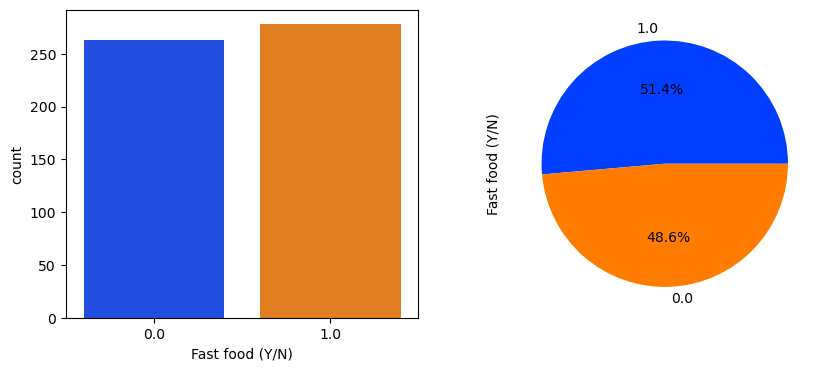

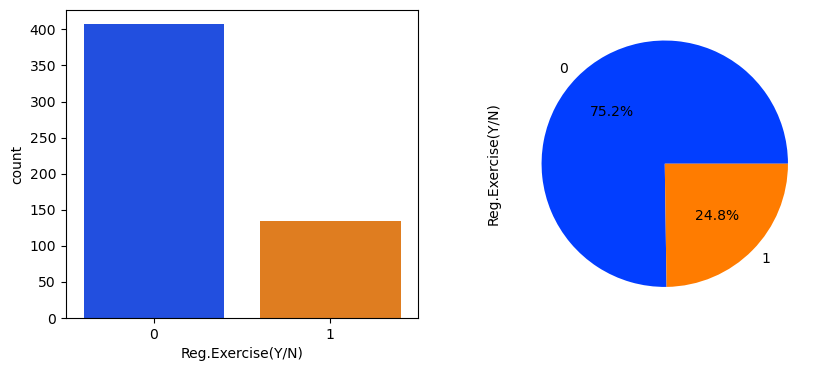

In [63]:
# Univariate data analysis of categorical variable
# Analysis reference
# 0 indicates no 
# 1 indicates yes
categorical_data = PCOS_data[['PCOS (Y/N)','Blood Group','Pregnant(Y/N)','Weight gain(Y/N)','hair growth(Y/N)'
          ,'Skin darkening (Y/N)','Hair loss(Y/N)','Pimples(Y/N)','Fast food (Y/N)','Reg.Exercise(Y/N)']]

for i, col in enumerate(categorical_data.columns):
    sns.set_palette('bright')
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    sns.countplot(data=categorical_data,x=col,ax=ax[0])
    categorical_data[col].value_counts().plot.pie(autopct='%1.1f%%',radius=1,ax=ax[1])
                    


C:\Users\chimi\AppData\Local\Temp\ipykernel_7276\1338569069.py:8: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



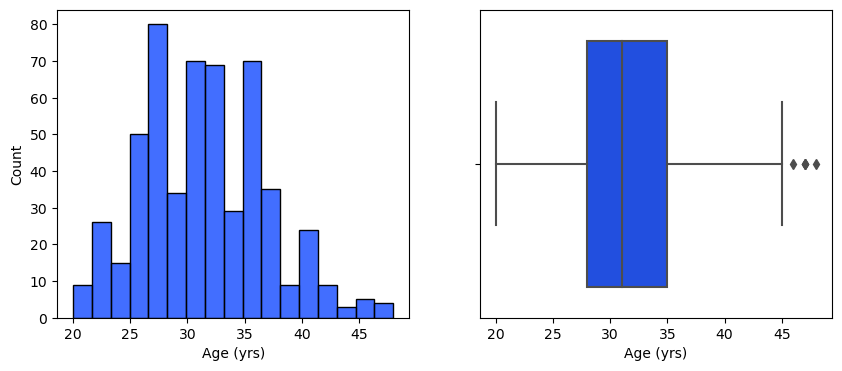

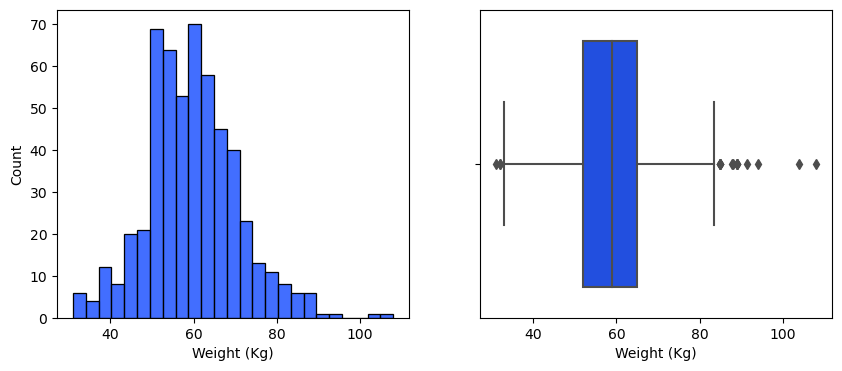

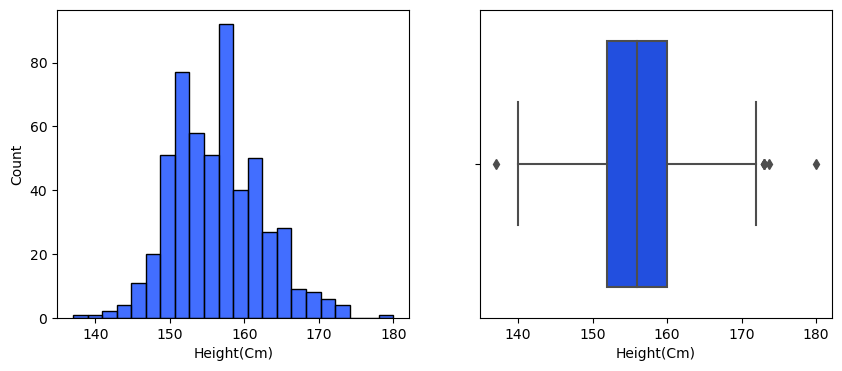

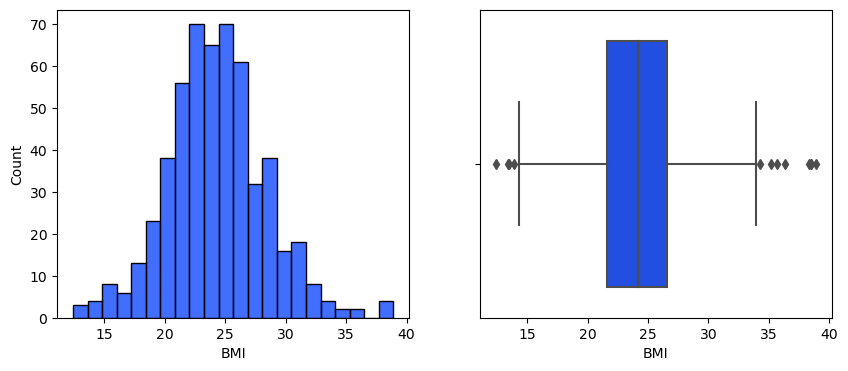

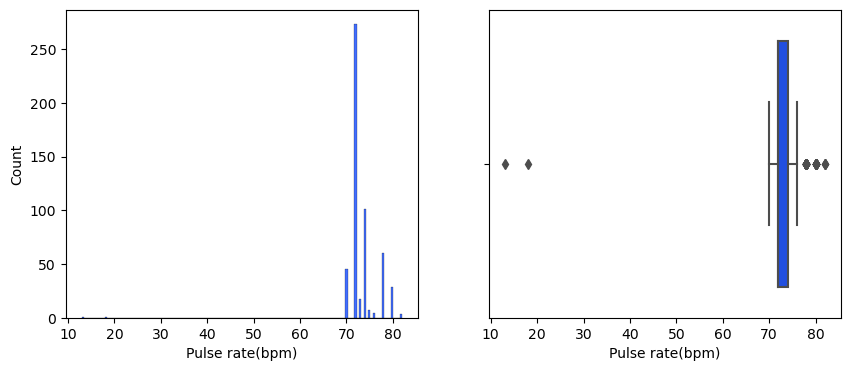

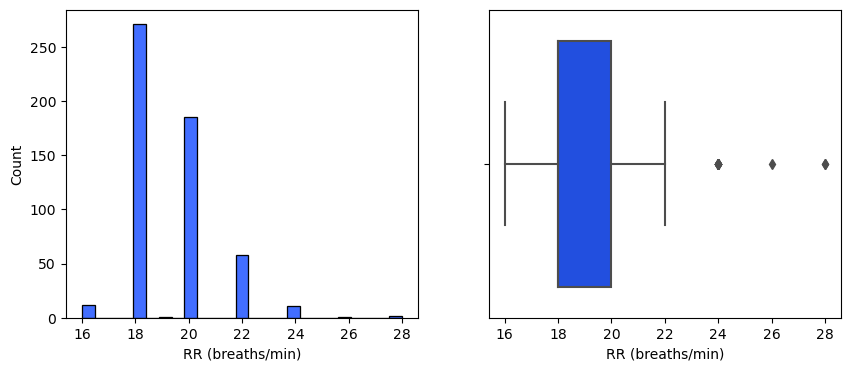

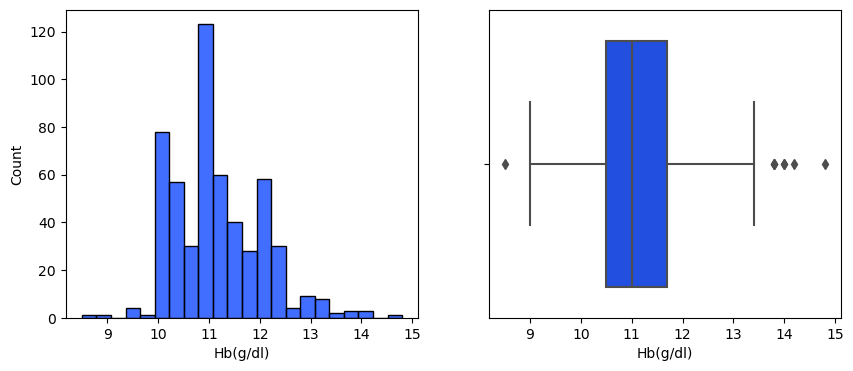

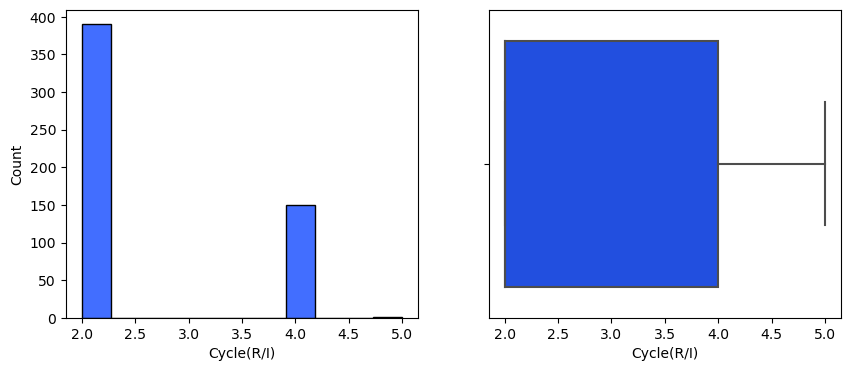

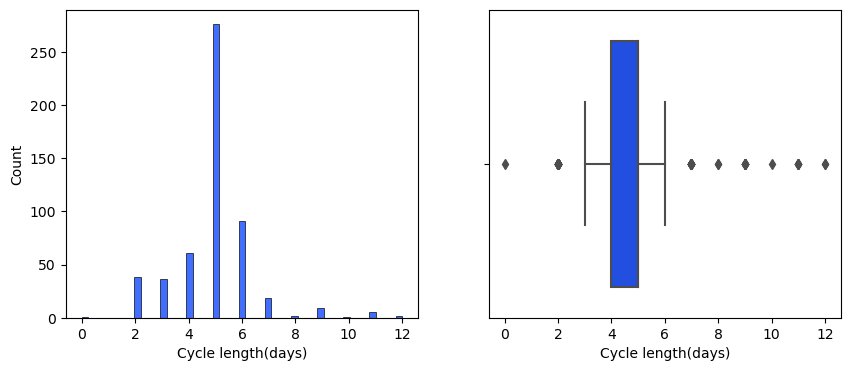

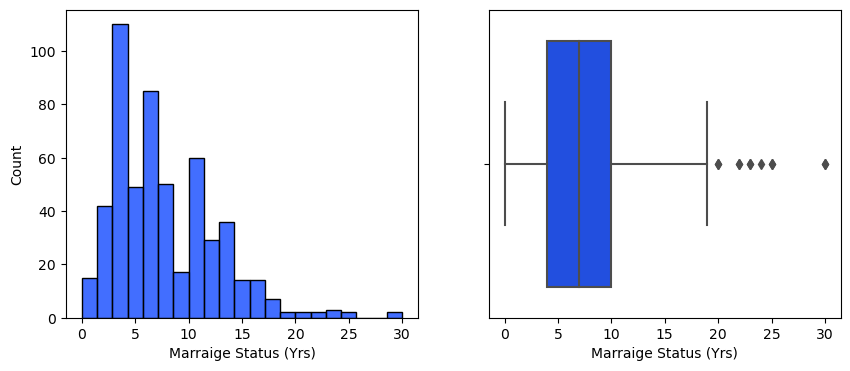

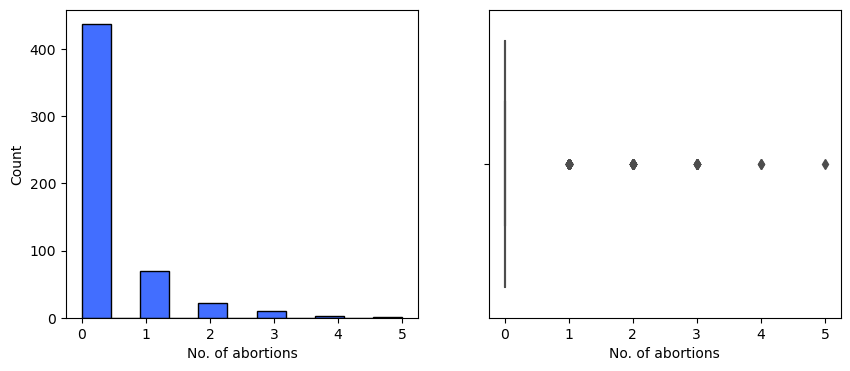

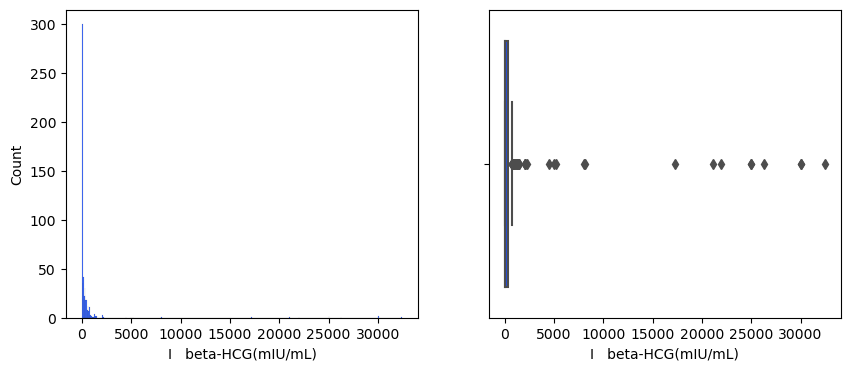

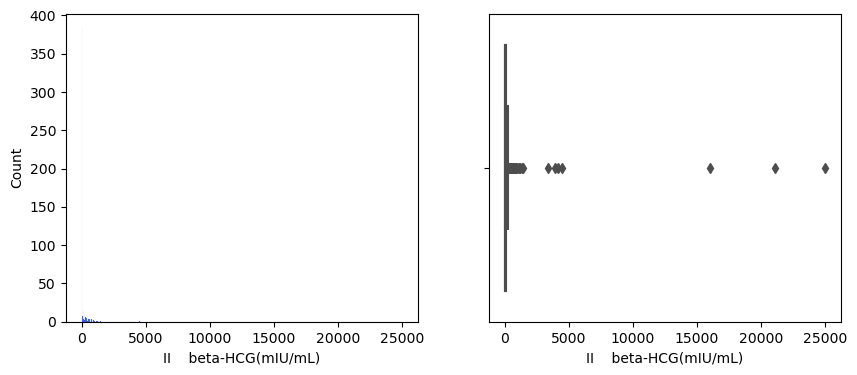

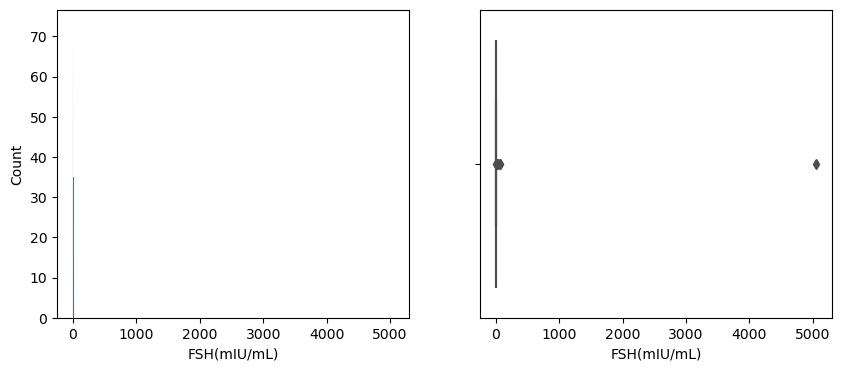

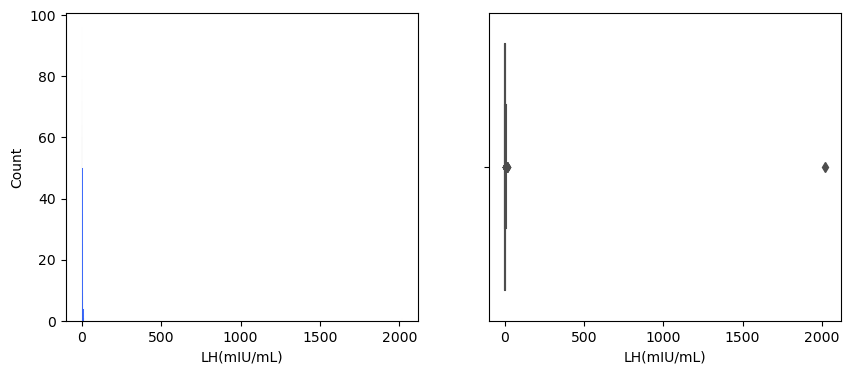

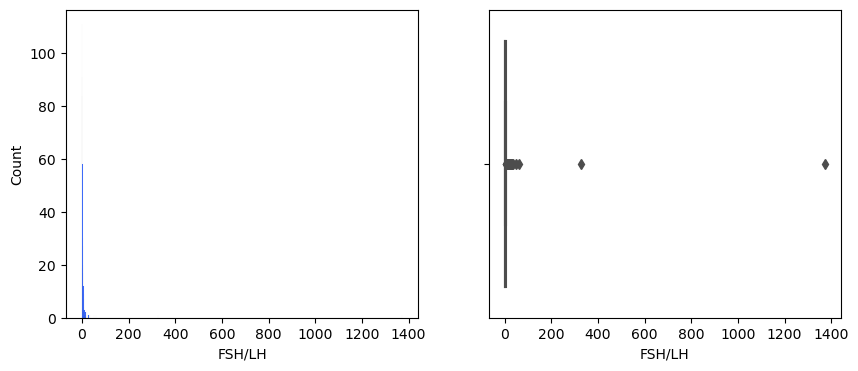

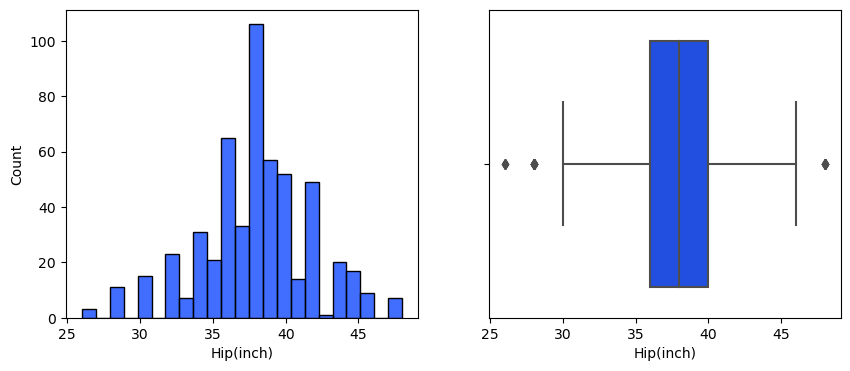

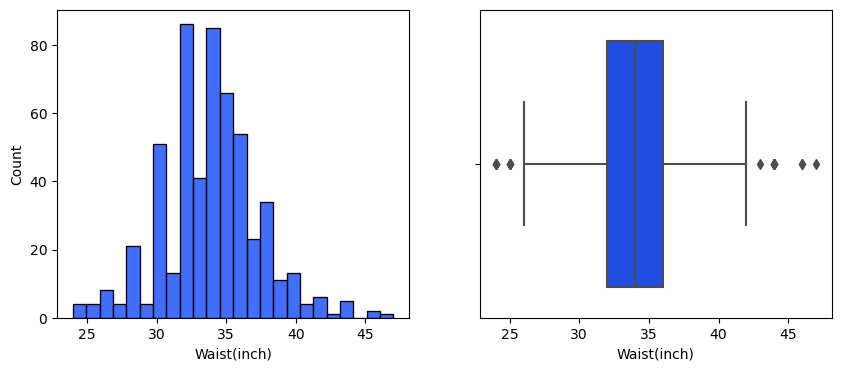

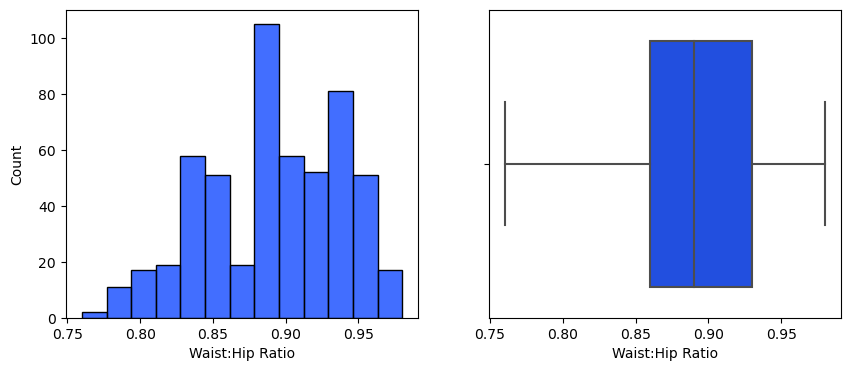

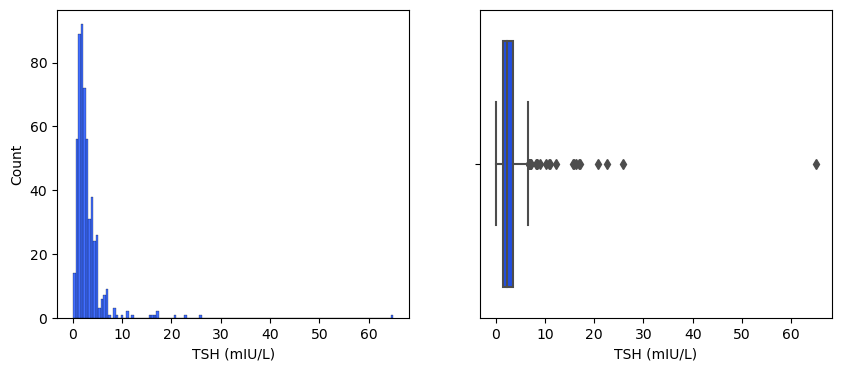

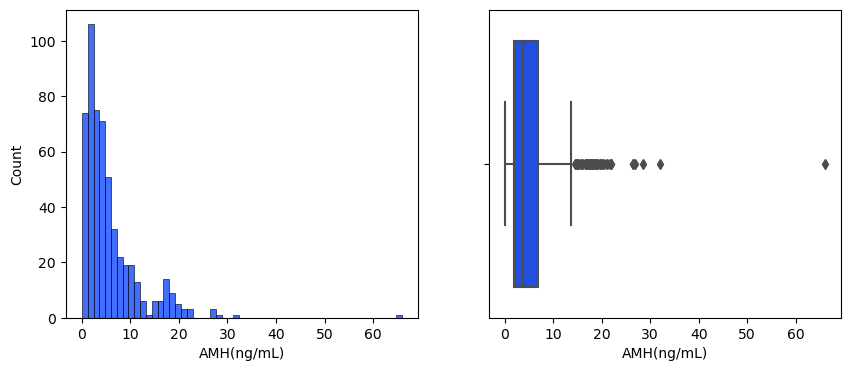

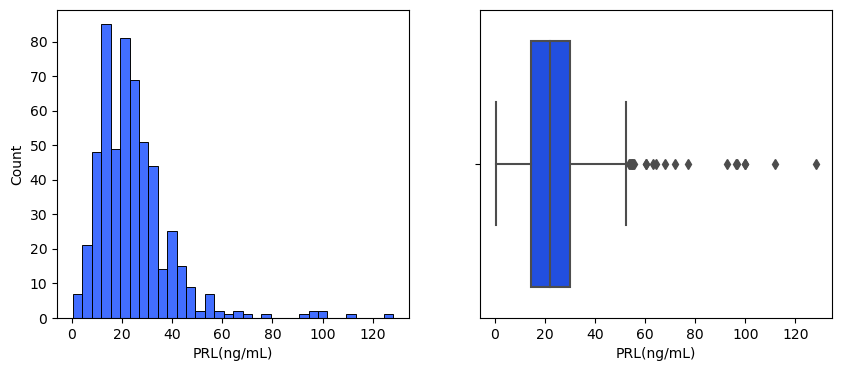

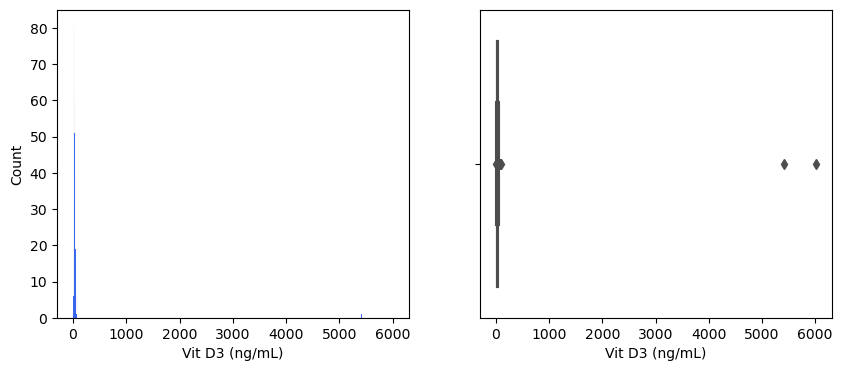

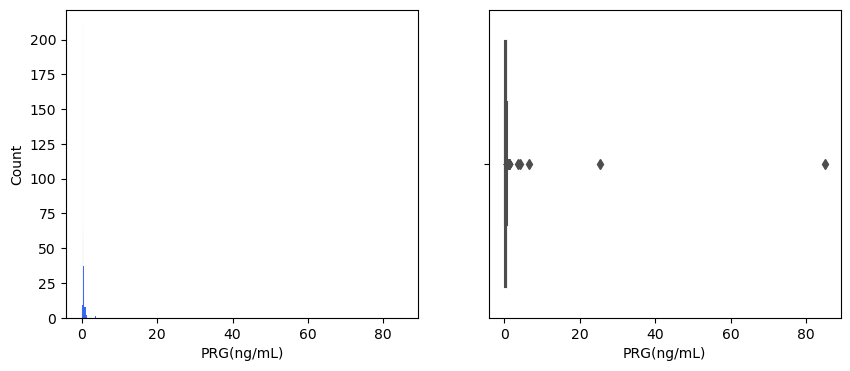

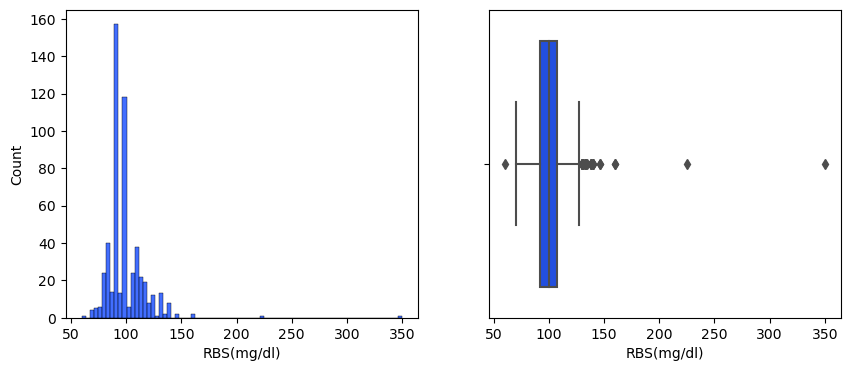

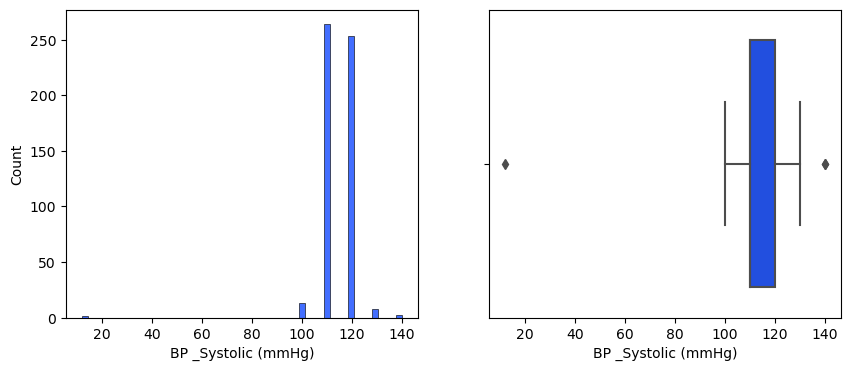

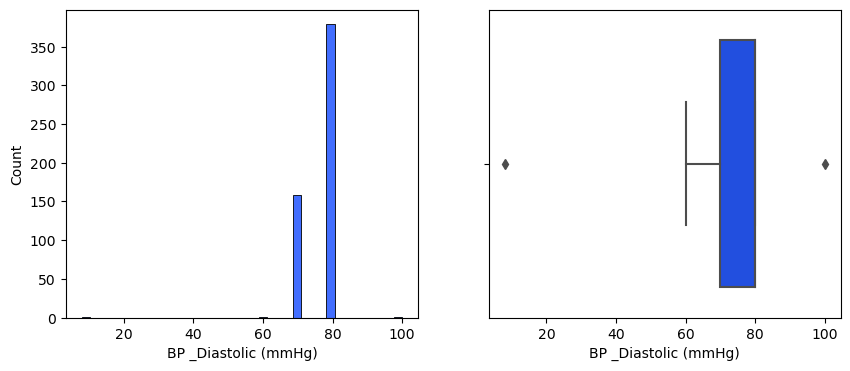

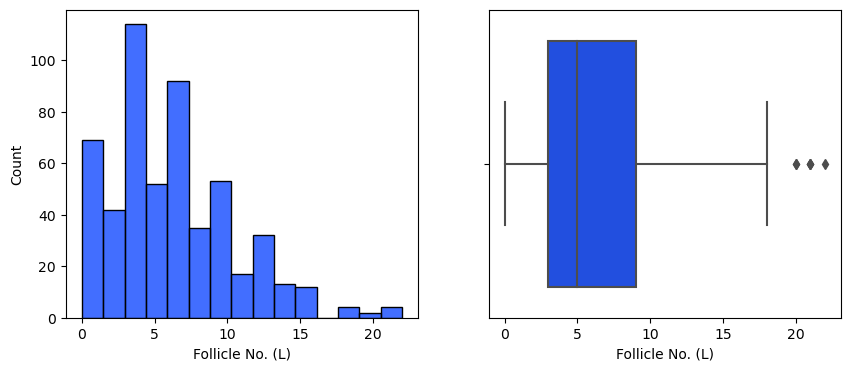

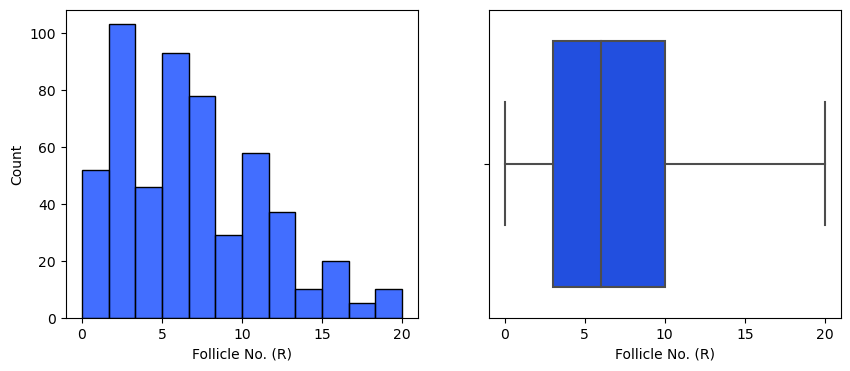

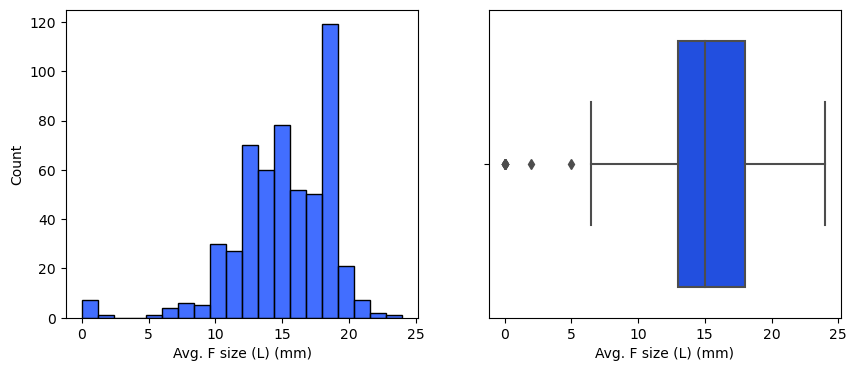

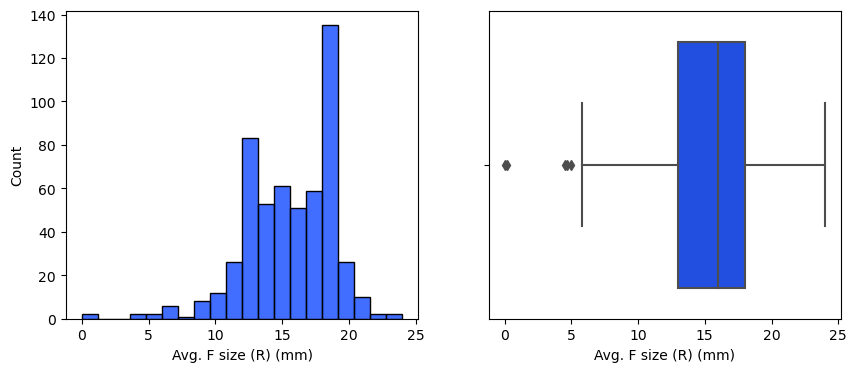

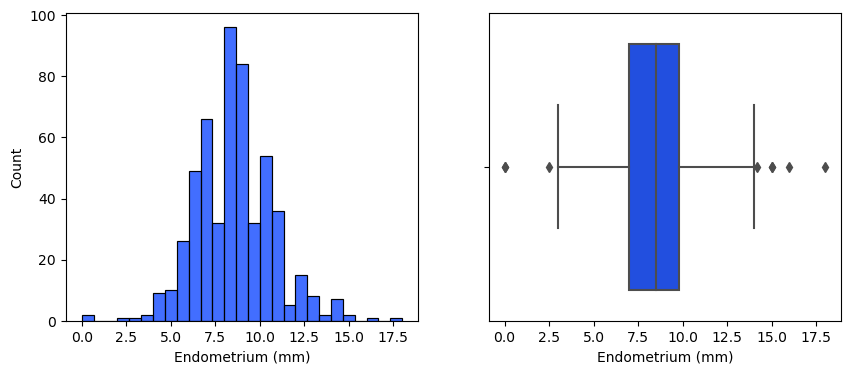

In [64]:
# Univarate data analysis numerical
# Some numerical data have outliers and there are few normally distributed.
# Keeping outliers as we are using logistic regression
numerical_data = PCOS_data.drop(columns=['PCOS (Y/N)', 'Blood Group', 'Pregnant(Y/N)', 'Weight gain(Y/N)','hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)','Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)'], axis=1)
numerical_data =numerical_data.apply(pd.to_numeric,errors='coerce')
for i , cols in enumerate(numerical_data.columns):
    sns.set_palette('bright')
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    sns.histplot(data=numerical_data,x=cols,ax=ax[0])
    sns.boxplot(x=cols,data=numerical_data,ax=ax[1])

<AxesSubplot:>

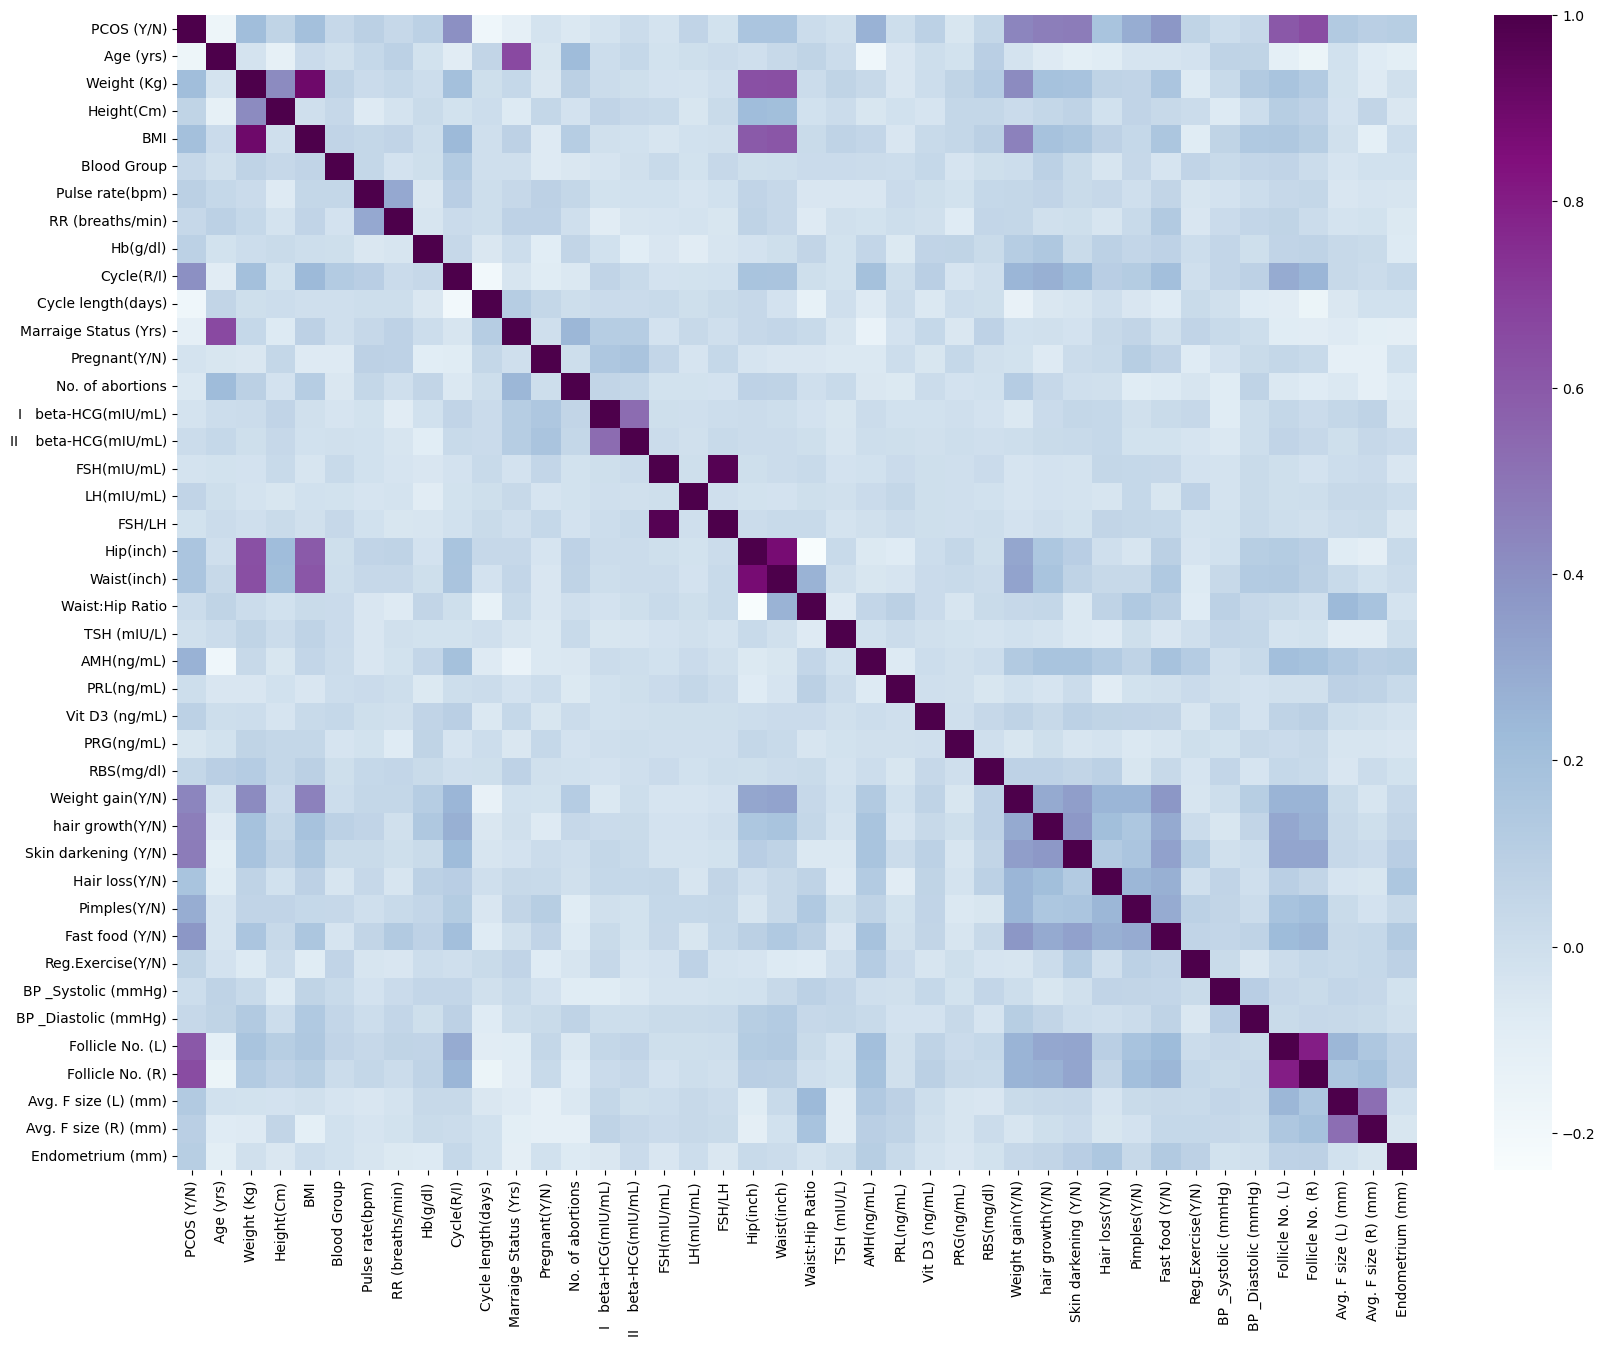

In [65]:
# Purple indicates a strong correleation
# There is a strong correleation between our target variable PCOS(Y/N) and Follicles numbers.
corr = PCOS_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap='BuPu')


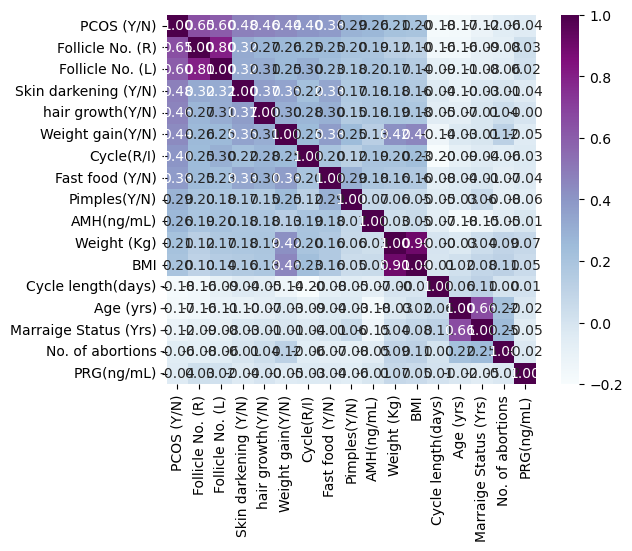

In [66]:
# There is a strong linear positive relationship between follolicles No(R) and Follicle No(R)

top12_corr = corr.nlargest(12, "PCOS (Y/N)")["PCOS (Y/N)"].index 
top5small_corr = corr.nsmallest(5, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = top12_corr.append(small_corr) 

cm = np.corrcoef(PCOS_data[cols].values.T)
hm = sns.heatmap(cm, cbar=True,cmap='BuPu', annot=True, square=True, fmt='.2f',yticklabels=cols.values, xticklabels=cols.values)



<AxesSubplot:xlabel='PCOS (Y/N)'>

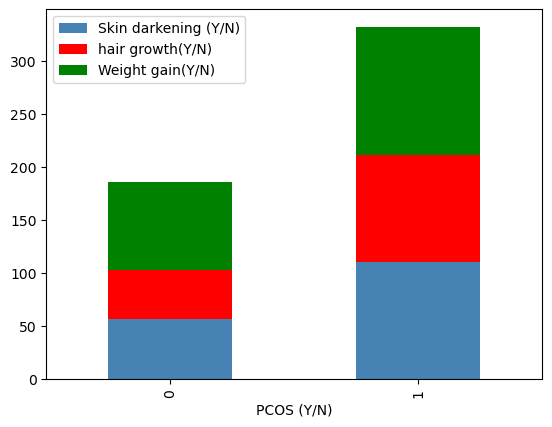

In [32]:
# Overall comparision of highly correleated categorical variables
# As the graphs display, women diagnosed with PCOS report much less skin darkening, hair growth, and weight gain.
group_data = PCOS_data.groupby('PCOS (Y/N)')[['Skin darkening (Y/N)','hair growth(Y/N)','Weight gain(Y/N)']].sum().reset_index()
group_data.set_index('PCOS (Y/N)').plot(kind='bar',stacked=True, color=['steelblue', 'red','green'])

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='Follicle No. (L)'>

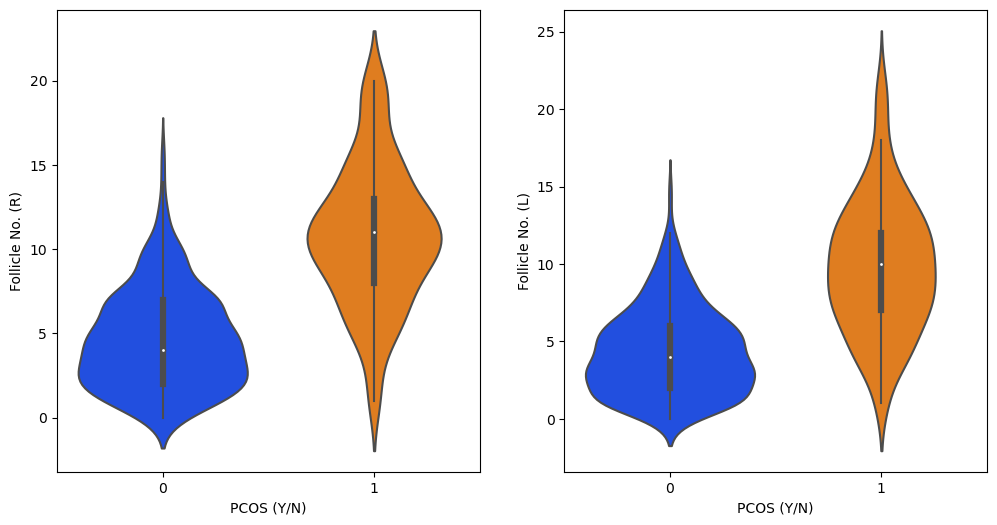

In [67]:
# Do women who are diganosed with PCOS have a higher follices?
# Graph shows women with  PCOS are more likely to have more hair follicles.
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.violinplot(x='PCOS (Y/N)',y= 'Follicle No. (R)',data=PCOS_data,ax=ax[0])
sns.violinplot(x='PCOS (Y/N)',y='Follicle No. (L)',data=PCOS_data,ax=ax[1])    

<AxesSubplot:xlabel='Fast food (Y/N)', ylabel='count'>

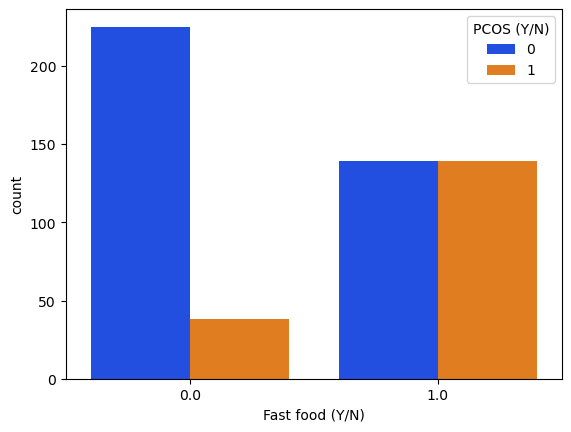

In [68]:
# Does fast food consumption lead to PCOS?
#  Fast food consumption somewhere leads to PCOS but not on a massive scale.
sns.countplot(x='Fast food (Y/N)',hue='PCOS (Y/N)',data=PCOS_data)

<AxesSubplot:xlabel='Age (yrs)', ylabel='AMH(ng/mL)'>

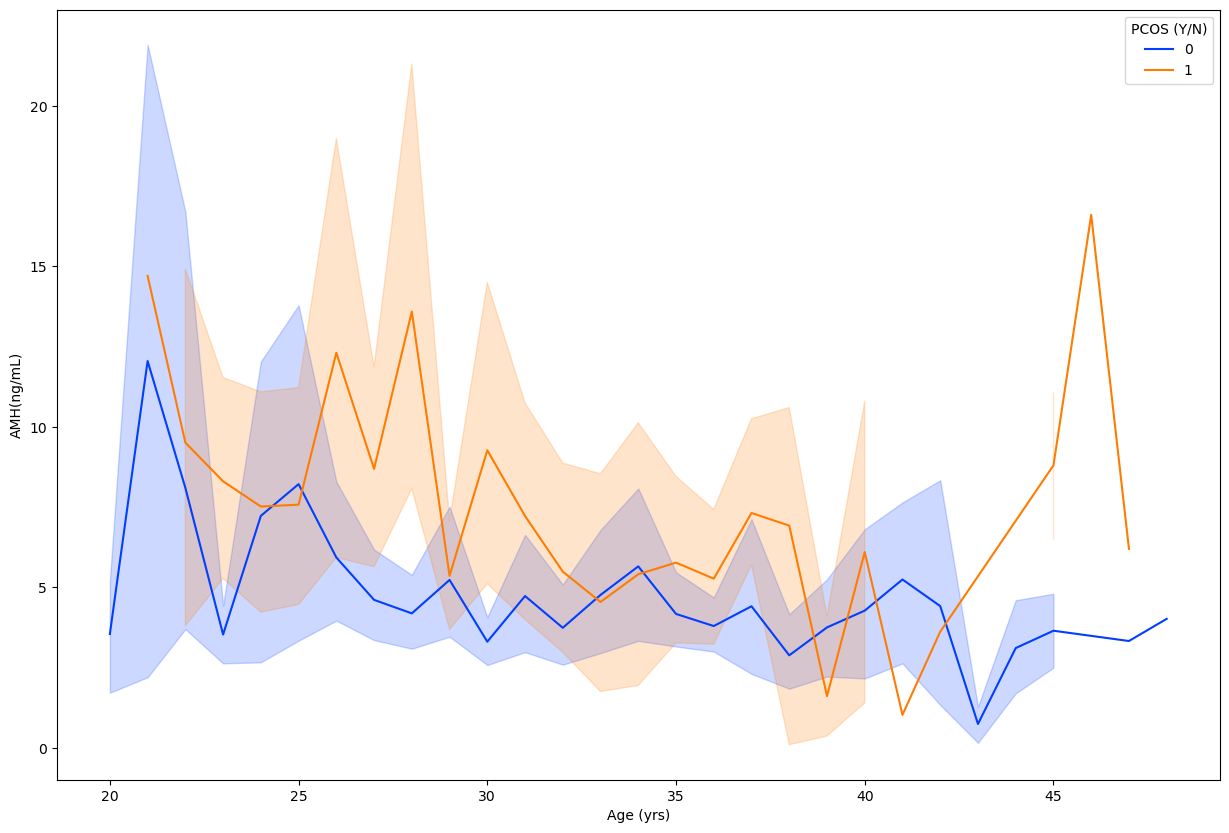

In [38]:
# How is fertility impacted by PCOS?
#Compared to women without PCOS, women with PCOS see a dramatic decrease in fertility as they age.
# For women without PCOS, the decline is more consistent. However, PCOS women see more of a dramatic decline with age.
plt.figure(figsize=(15,10))
sns.lineplot(x='Age (yrs)',y='AMH(ng/mL)',hue='PCOS (Y/N)',data=PCOS_data)

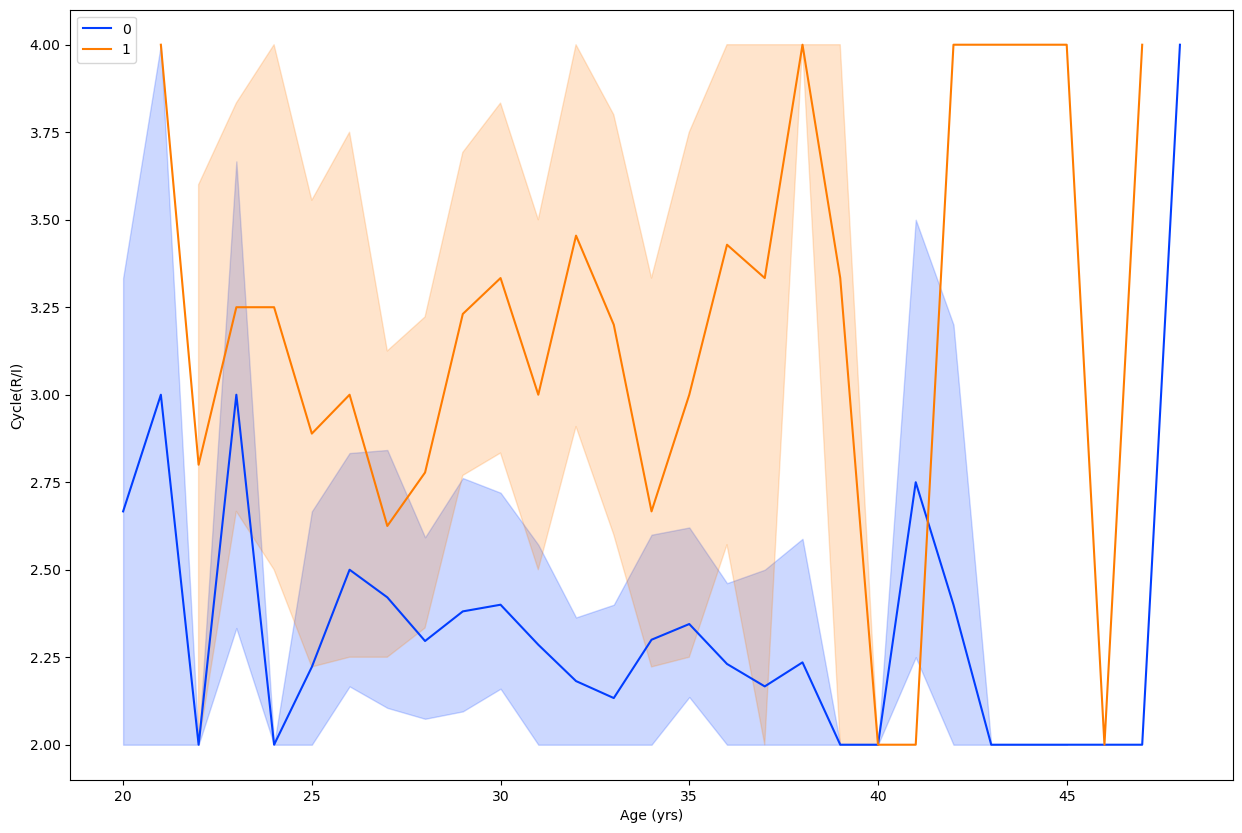

In [403]:
# What is the relationship between cycle(R/I) and Age?
# As the age, the cycle becomes irregular for both types of women. Generally, however, the irregularity is higher in women who have PCOS.
plt.figure(figsize=(15,10))
sns.lineplot(data = PCOS_data, y='Cycle(R/I)', x='Age (yrs)',hue='PCOS (Y/N)')
plt.legend()

<AxesSubplot:xlabel='Age (yrs)', ylabel='Cycle length(days)'>

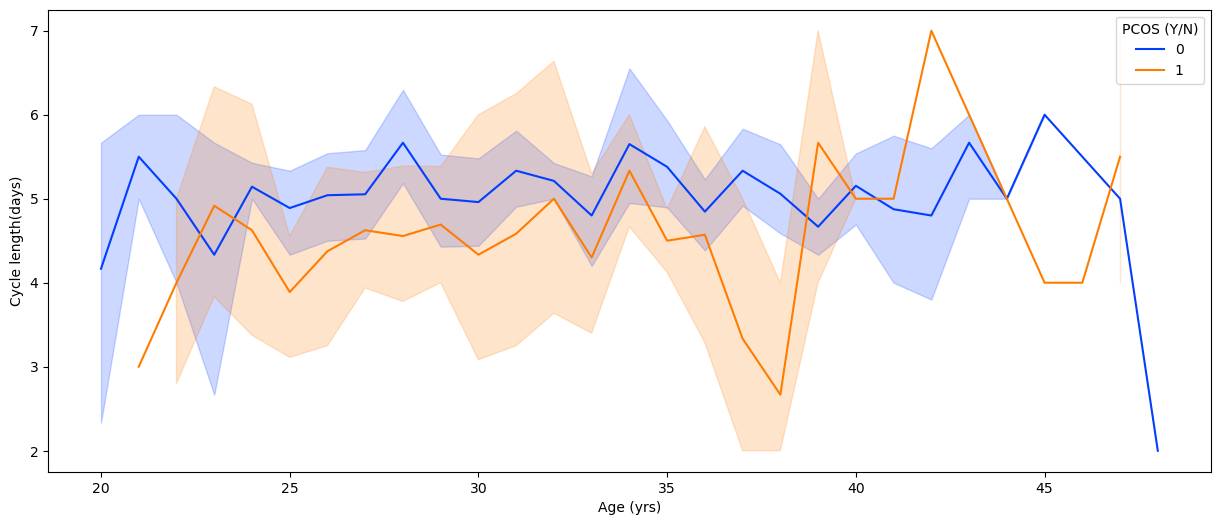

In [404]:
# What is the length of cycle of menustration cycle for woman with PCOS?
#As they age, the cycle length(days) for women with PCOS becomes shorter while PCOS becomes longer.
plt.figure(figsize=(15,6))
sns.lineplot(data = PCOS_data, y='Cycle length(days)', x='Age (yrs)',hue='PCOS (Y/N)')


<AxesSubplot:xlabel='Age (yrs)', ylabel='BMI'>

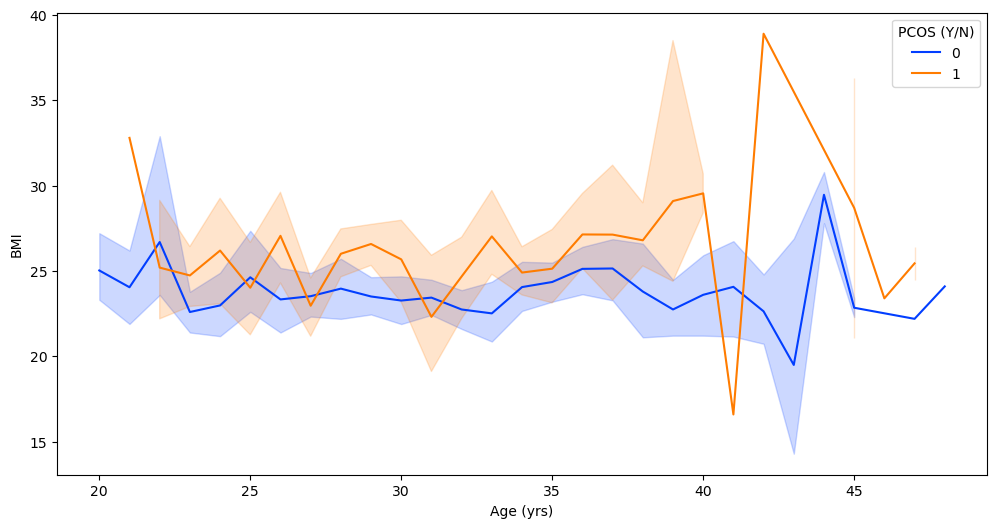

In [405]:
# What is the relationship between BMI and Age?
# Compared to women with PCOS,non-PCOS women have a consistent trend of BMI or no dramatic increase.
plt.figure(figsize=(12,6))
sns.lineplot(data = PCOS_data, y='BMI',x = 'Age (yrs)', hue='PCOS (Y/N)')

In [406]:
# Logistic Regression
from sklearn.model_selection import train_test_split

In [407]:
X = PCOS_data.drop(columns ='PCOS (Y/N)',axis=1)
y = PCOS_data['PCOS (Y/N)']

In [416]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [409]:
from sklearn.linear_model import LogisticRegression

In [419]:
logmodel = LogisticRegression()
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [413]:
predictions = logmodel.predict(X_test)

In [82]:
# Predicting PCOS using Decision Tree
# Split the data
from sklearn.model_selection import train_test_split

In [80]:
X = PCOS_data.drop('PCOS (Y/N)',axis=1)
y = PCOS_data['PCOS (Y/N)']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtree = DecisionTreeClassifier()

In [86]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
predictions = dtree.predict(X_test)

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
# Better Accuracy
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       104
           1       0.77      0.80      0.78        59

    accuracy                           0.84       163
   macro avg       0.83      0.83      0.83       163
weighted avg       0.84      0.84      0.84       163



In [90]:
print(confusion_matrix(y_test,predictions))

[[90 14]
 [12 47]]


In [97]:
# Tree visulization
from IPython.display import Image  
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(PCOS_data.columns[1:])
features

['Age (yrs)',
 'Weight (Kg)',
 'Height(Cm)',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm)',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of abortions',
 'I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

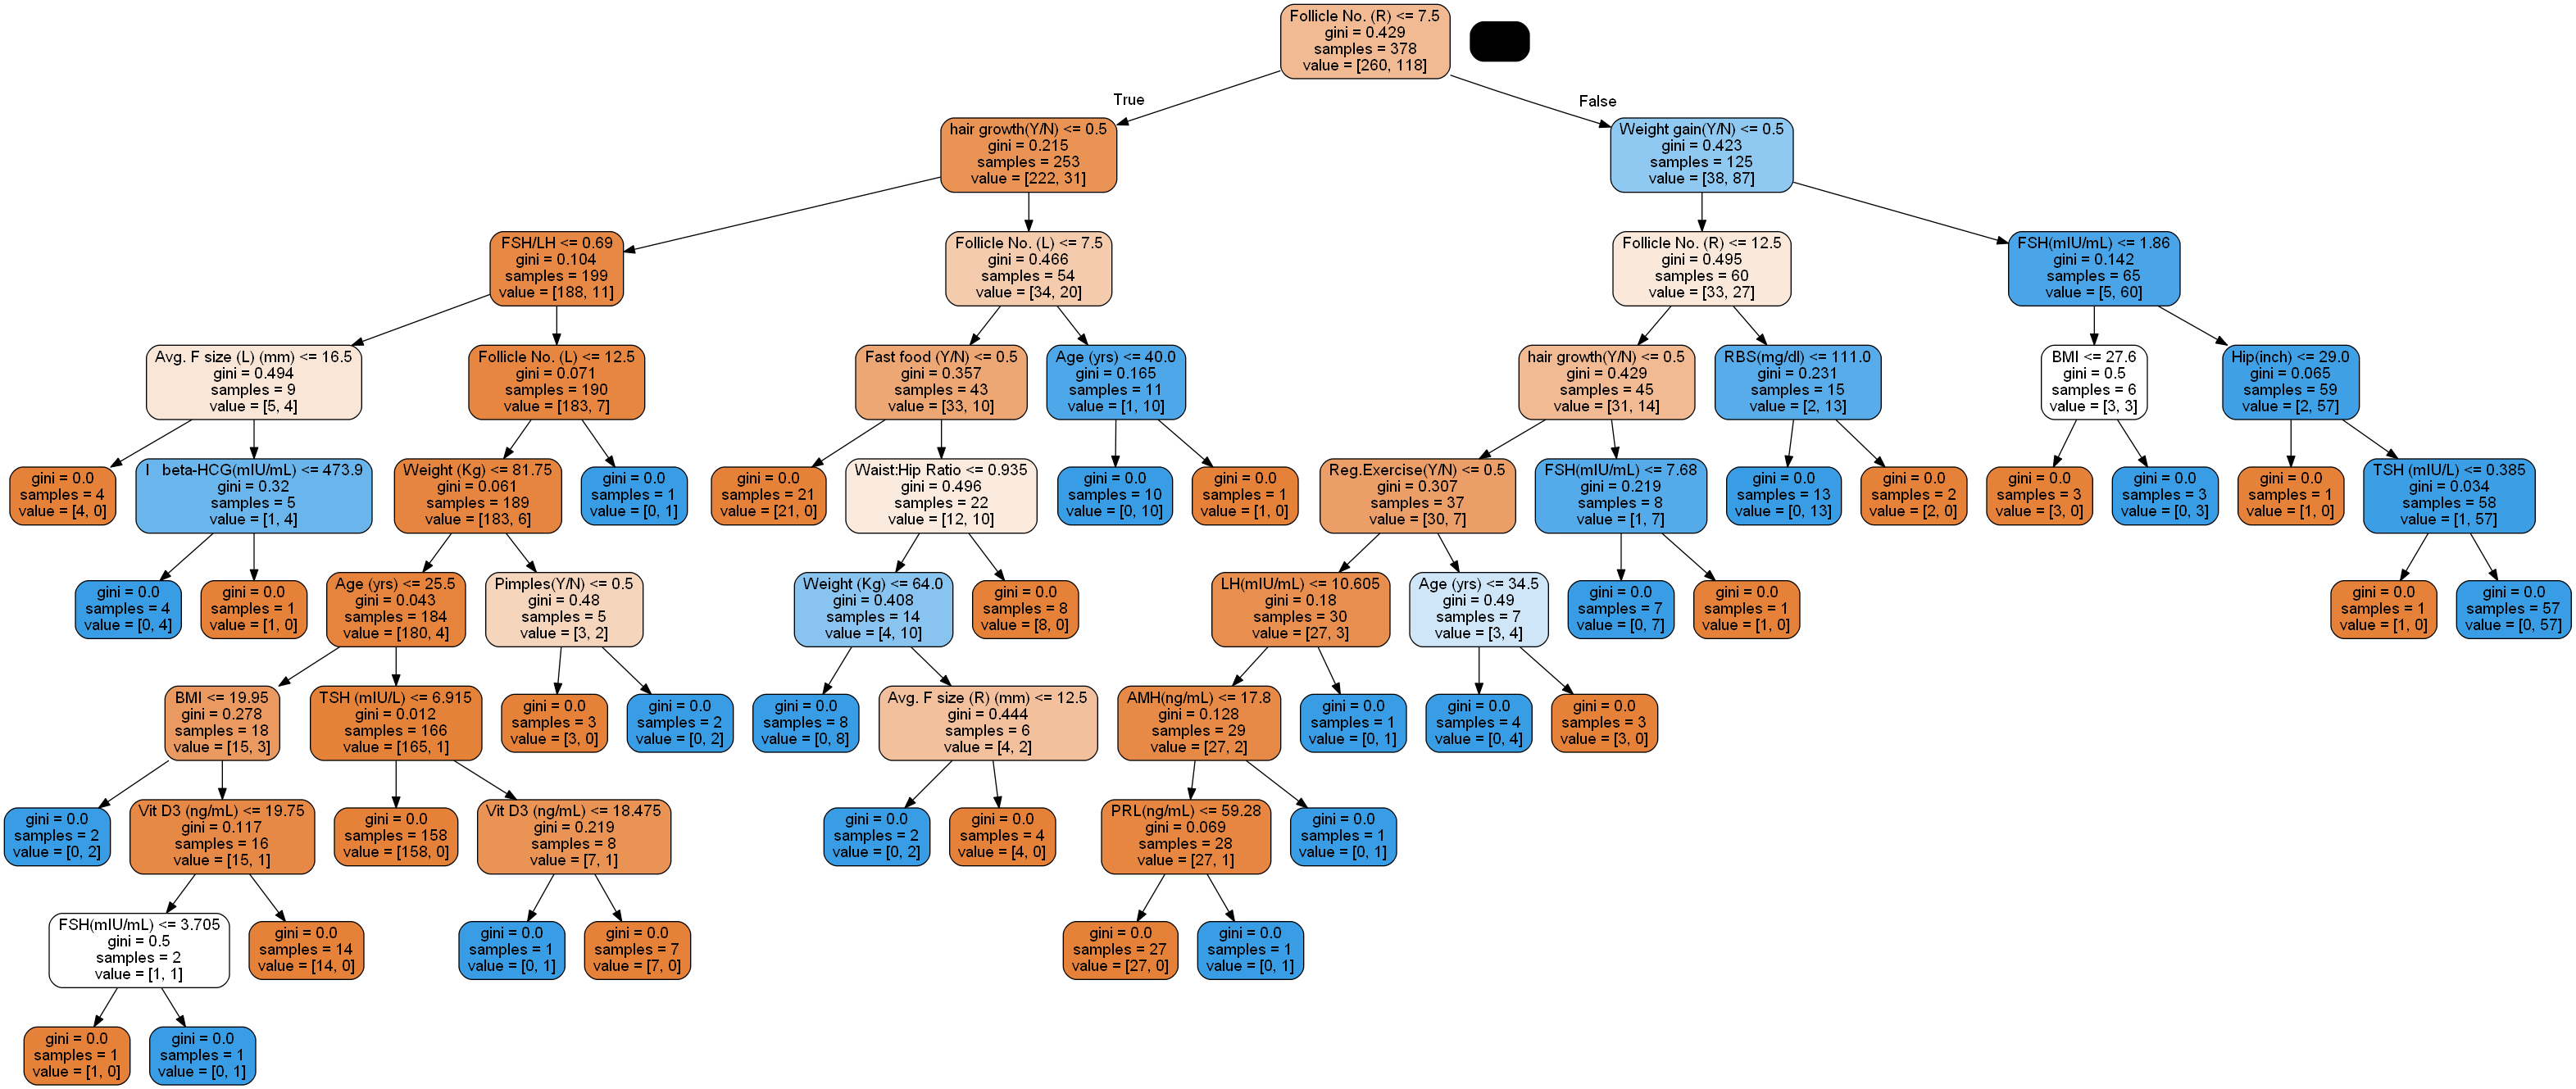

In [107]:
# Build a Decion Tree
# Follicles have the lowest purity-internal node
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  


In [101]:
# Compare Random Forest with Decion Tree
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
rfc_pred = rfc.predict(X_test)

In [103]:
print(confusion_matrix(y_test,rfc_pred))

[[102   2]
 [ 17  42]]


In [104]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       104
           1       0.95      0.71      0.82        59

    accuracy                           0.88       163
   macro avg       0.91      0.85      0.87       163
weighted avg       0.89      0.88      0.88       163

